In [20]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Задание

Допишите реализацию класса для обучения полиномиальной регресии, то есть по точкам $x_1, x_2, \dots, x_n$ и $y_1, y_2, \dots, y_n$ и заданному числу $d$ решить оптимизационную задачу:

$$ \sum_{i=1}^n (~f(x_i) - y_i~)^2 \min_f,$$ где f – полином степени не выше $d$.

In [93]:
class PolynomialRegression(object):
    
    def __init__(self, max_degree=1):
        self.max_degree = max_degree + 1
        self.weights = np.zeros(max_degree)
    
    # Построим матрицу подстановок
    def get_substitution_matrix(self, x):
        subst_matrix = []
        powers = np.linspace(0, self.max_degree - 1, self.max_degree)
        for i in range(len(x)):
            subst_matrix.append(x[i] ** powers)
        return np.array(subst_matrix)
        
    def fit(self, points_x, points_y):
        # Получим матрицу подстановок
        X = self.get_substitution_matrix(points_x)
        # Будем решать уравнение Xw=y
        points_y = np.reshape(np.array(points_y), (len(points_y),1))
        inv = np.linalg.inv(X.T @ X)
        self.weights = (inv @ X.T) @ points_y
        return self
        
    def predict(self, points_x):
        # insert your code here to predict the values
        X = self.get_substitution_matrix(points_x)
        points_x = np.array(points_x)
        return X @ self.weights

In [94]:
np.random.seed(42)
points_x = np.random.uniform(-10, 10, size=10)
# we use list comprehesion but think about how to write it using np.array operations
points_y = np.array([4 - x + x ** 2 + 0.1 * x ** 3 + np.random.uniform(-20, 20) for x in points_x])

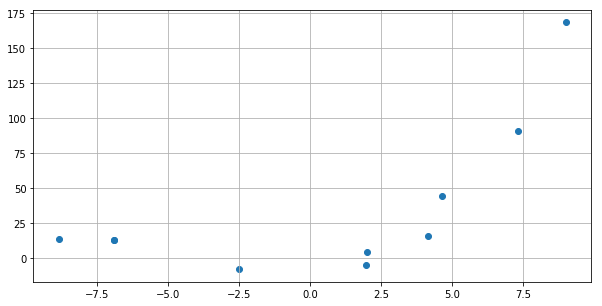

In [95]:
plt.figure(figsize=(10, 5))
plt.scatter(points_x, points_y)
plt.grid()
plt.show()

In [96]:
def plot_model(max_degree):
    plt.figure(figsize=(10, 5))
    plt.scatter(points_x, points_y)
    model = PolynomialRegression(max_degree).fit(points_x, points_y)
    all_x = np.arange(-10, 10.1, 0.1)
    plt.plot(all_x, model.predict(all_x))
    plt.grid()
    plt.show()

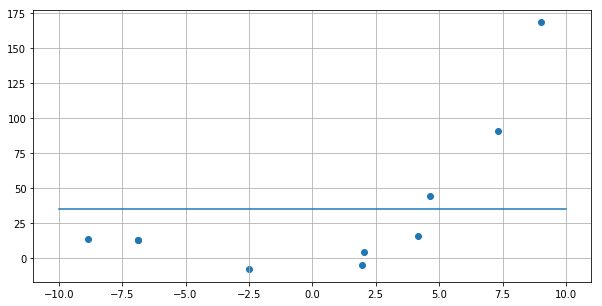

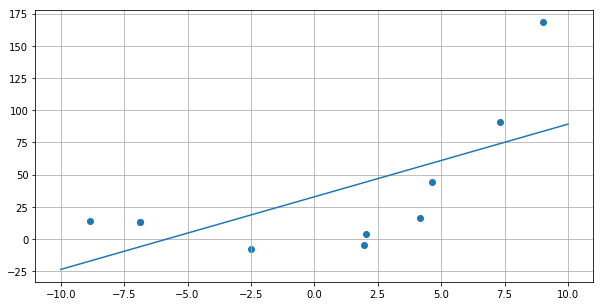

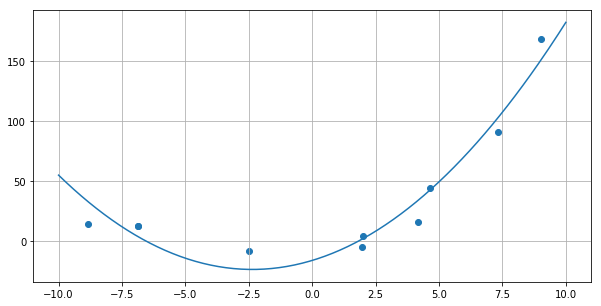

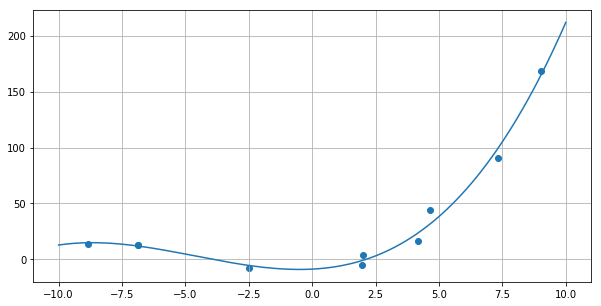

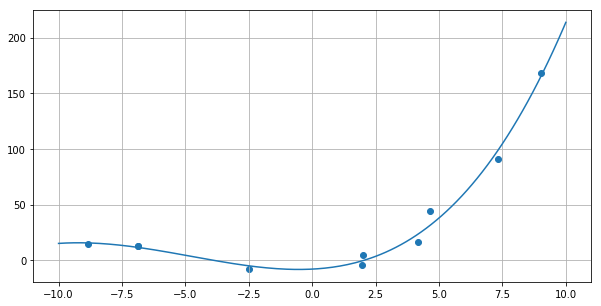

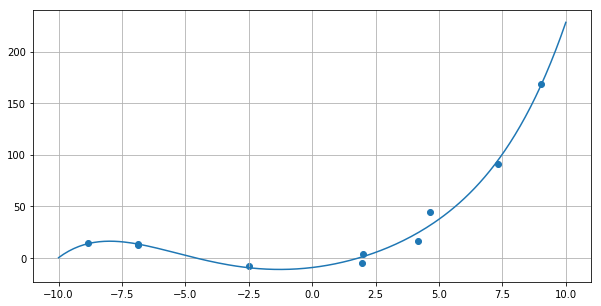

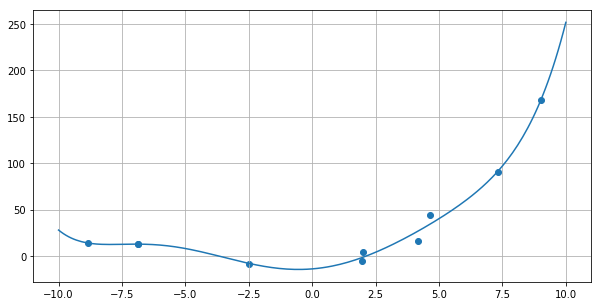

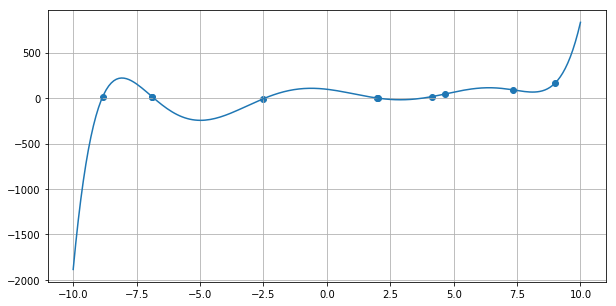

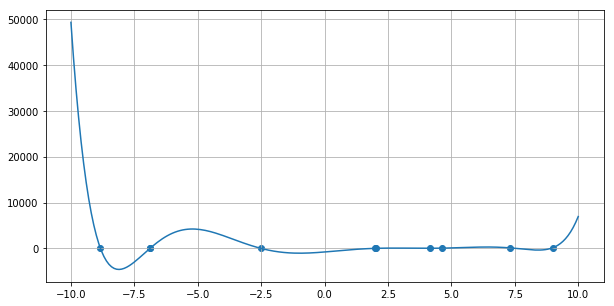

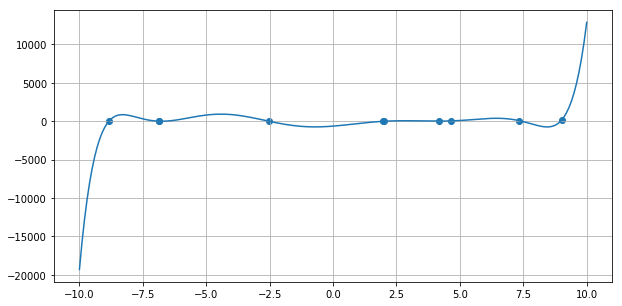

In [97]:
for i in range(10):
    plot_model(i)

Объясните почему графики меняются таким образом

#### Ответ:
Степень полинома увеличивается. Он подстраивается под большее число точек, что ведет к переобучению.

**Значение для формы**

In [98]:
print(int(
    PolynomialRegression(7).fit(points_x, points_y).predict([10])[0]
    + PolynomialRegression(1).fit(points_x, points_y).predict([-5])[0]
    + PolynomialRegression(4).fit(points_x, points_y).predict([-15])[0]
))

811
